### Whats the point in Bayesian Inference?
The core of Bayesian Inference is to combine two different distributions (likelihood and prior) into one “smarter” distribution (posterior). Posterior is “smarter” in the sense that the classic maximum likelihood estimation (MLE) doesn’t take into account a prior. Once we calculate the posterior, we use it to find the “best” parameters and the “best” is in terms of maximizing the posterior probability, given the data.




<img src="bayesiantheorem.PNG">




### Example
I have about 2,000 readers per day visiting my Medium blog. Some people clap after reading articles and some don’t. I’d like to make predictions about what percentage of people will engage and clap when I write a new blog post in the future. You can try this on...CTR, tinder swipes, conversion rates etc..
[source](https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6)


In [5]:
# lets generate some data
import numpy as np
# generate 2000 readers's responses
# assume claps follow bernoulli process, 1 means clap, 0 means no clap

clap_prob = 0.3

# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)
print('clap data looks like this..')
print(clap_data)


print('Length of data:' + str(len(clap_data)))

clap data looks like this..
[0 0 1 ... 1 0 0]
Length of data:2000


### 3 steps to bayesian
1. (*Prior*) Choose a PDF to model your parameter $\theta$, aka the prior distribution $P(\theta)$. this is your best guess about parameters before seeing the data $X$

2. (*Likelihood*) Choose a PDF for $P(X|\theta)$. Basically you are modelling how the data $X$ will look like given the parameter $\theta$

3. (*Posterior*) Calculate the posterior distribution $P(\theta|X)$ and pick $\theta$ that has the highest $P(\theta|X)$


### Step 1: Prior $P(\theta)$
the parameter $\theta$ represents the clapping probability here
Since theres only 1 thing to predict here, we use Beta rather than Dirichlet. To use beta distribution, we need $\alpha$ & $\beta$. Think of $\alpha$ as number of claps and $\beta$ as number that didnt clap. tick tock think of binomial wink wink

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
# number of claps
a = 400 
# number that didnt clap
b = 2000 - a
# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

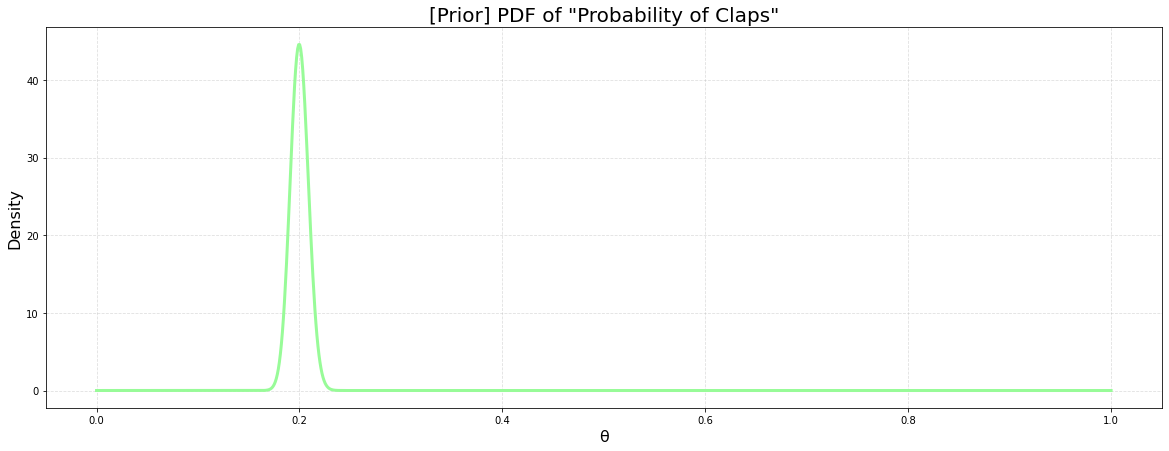

In [7]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')
# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

# It spikes at 20% (400 claps / 2000 readers) as expected. Two thousand data points seem to produce a strong prior

### Step 2: Likelihood $P(X|\theta)$

Choose a probability model for P(X|θ), the probability of seeing the data X given a particular parameter θ. Likelihood is also called a sampling distribution.

So far, we have the number of visitors and the probability of claps..so that N & p... and that shouts BINOMIAL DISTRIBUTION!!

In [9]:
# The sampling dist P(X|θ) with a prior θ
# the clap data provided was generated via binom with probability = 0.3
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = a/(a+b))
likelihood

3.651738644581292e-21

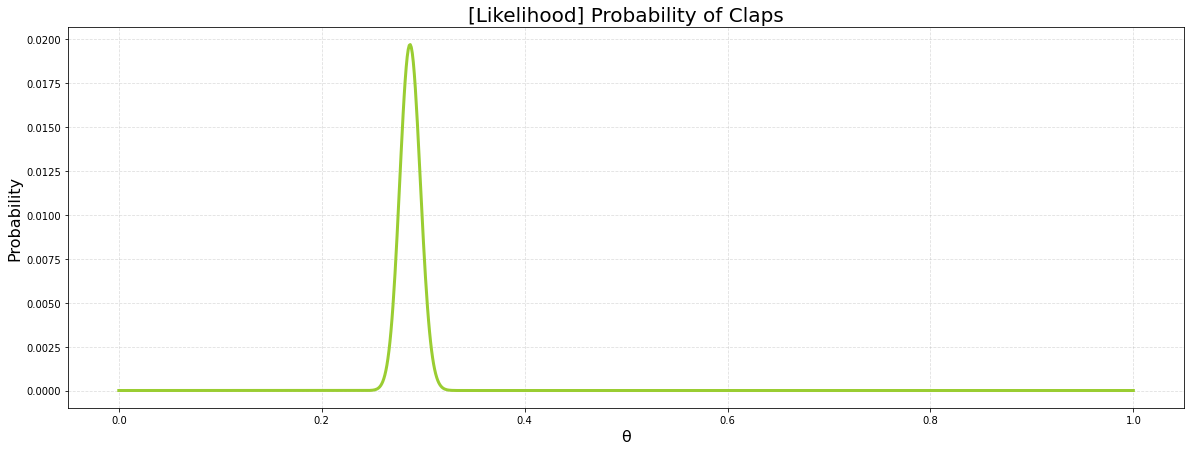

In [12]:
#lets see the graph of $P(X|\theta)$ for all possible $\theta$
# Likelihood P(X|θ) for all θ's
likelihood = stats.binom.pmf(k=np.sum(clap_data), n=len(clap_data),p = theta_range)
# Create the plot
fig, ax = plt.subplots()
plt.plot(theta_range, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

### Step 3: Posterior $P(\theta|x)$

We calculated the prior by subtracting two stats.beta.cdf instead of using stats.beta.pdf because the likelihood stats.binom.pmf is a probability while stats.beta.pdf returns a density.


In [13]:
theta_range_e = theta_range + 0.001

prior = stats.beta.cdf(x=theta_range_e, a=a, b=b) - stats.beta.cdf(x=theta_range, a=a, b=b) 

likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 

posterior = likelihood*prior 
normalized_posterior = posterior / np.sum(posterior)

In [14]:
print(np.argmax(prior))
print(np.argmax(likelihood))
print(np.argmax(posterior))

199
287
243


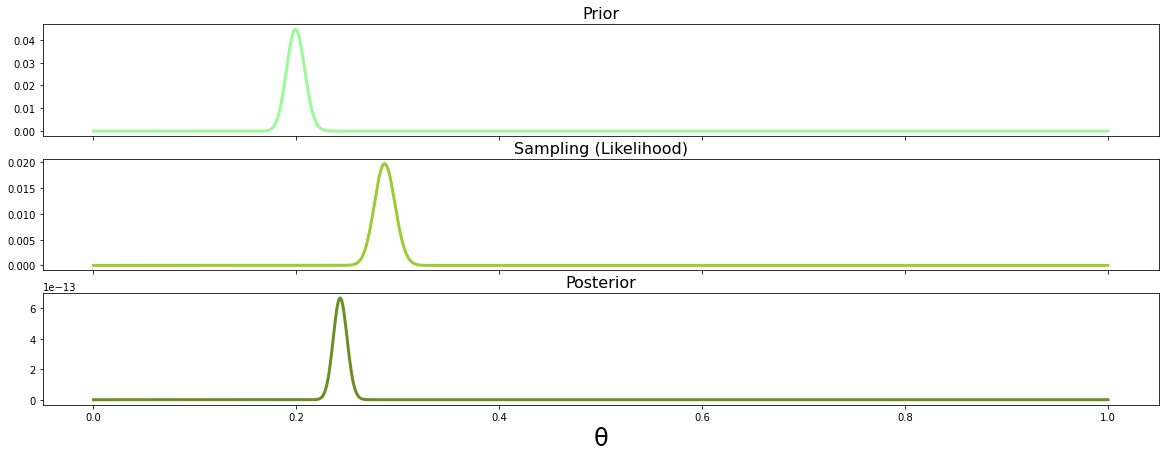

In [15]:
# Plotting all three together
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()

When you look at the posterior graph (the 3rd one), notice it is where the likelihood shifted toward the prior. The clapping probability for the prior was 20%. The clapping probability for the data was given as 30%. Now, the posterior has its peak around 0.25%.

Also, notice the width of the bell curves in prior/likelihood has shrunk in the posterior. Because we incorporated more information through sampling, the range of possible parameters is now narrower.